In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import colors
from copy import deepcopy

%matplotlib inline

# Simulations #1

## Read CSVs

In [47]:
rashomon_csv = "../Results/worst_case_rashomon.csv"
rashomon_raw_df = pd.read_csv(rashomon_csv)
rashomon_raw_df = rashomon_raw_df.drop("Unnamed: 0", axis=1)
rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff
0,10,0,4,1.273589,0.666667,True,0.431312
1,10,0,6,1.273541,0.666667,True,0.431312
2,10,0,6,1.246443,0.666667,True,0.431312
3,10,0,6,1.163541,0.500000,True,-0.031748
4,10,0,6,0.882880,1.000000,True,-0.124469


In [48]:
lasso_csv = "../Results/worst_case_lasso.csv"
lasso_raw_df = pd.read_csv(lasso_csv)
lasso_raw_df = lasso_raw_df.drop("Unnamed: 0", axis=1)
lasso_raw_df.head()

,n_per_pol,sim_num,MSE,L1_loss,IOU,min_dosage,best_pol_diff
0,10,0,1.292713,1.815938,0.0,False,0.767750
1,10,1,1.306908,1.829085,0.0,False,0.778222
2,10,2,1.213292,1.753783,0.0,False,0.595090
3,10,3,1.438126,1.972719,0.0,False,0.654070
4,10,4,1.455133,1.967549,0.0,False,0.875831


In [49]:
ct_csv = "../Results/worst_case_causal_trees.csv"
ct_raw_df = pd.read_csv(ct_csv)
ct_raw_df = ct_raw_df.drop("Unnamed: 0", axis=1)
ct_raw_df.head()

,n_per_pol,sim_num,MSE,IOU,min_dosage,best_pol_diff
0,10,0,0.882880,1.0,True,-0.124469
1,10,1,0.877615,1.0,True,-0.427215
2,10,2,0.877615,1.0,True,-0.427215
3,10,3,0.877615,1.0,True,-0.427215
4,10,4,0.877615,1.0,True,-0.427215


## Summarize rashomon sets results

In [50]:
rashomon_df = rashomon_raw_df.copy()

rashomon_df["best_pol_MSE"] = rashomon_df["best_pol_diff"]**2

group_by_cols = ["n_per_pol", "sim_num"]
result_cols = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_MSE"]
for result_col in result_cols:
    result_min_col = result_col + "_min"
    result_avg_col = result_col + "_mean"
    result_max_col = result_col + "_max"
    result_var_col = result_col + "_var"
    
    rashomon_df[result_min_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("min")
    rashomon_df[result_avg_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("mean")
    rashomon_df[result_max_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("max")
    rashomon_df[result_var_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("var")

rashomon_df = rashomon_df.drop_duplicates(group_by_cols)
rashomon_df = rashomon_df.drop(result_cols, axis=1)
rashomon_df = rashomon_df.drop(["best_pol_diff"], axis=1)
rashomon_df.head(n=10)

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,4,6.750000,9,3.071429,0.853268,1.056888,1.273589,0.039268,...,1.0,0.047619,False,0.875000,True,0.125000,0.001008,0.081593,0.186030,0.007644
8,10,1,4,6.750000,9,3.071429,0.940916,1.143865,1.351151,0.035473,...,1.0,0.047619,False,0.875000,True,0.125000,0.001543,0.152435,0.361632,0.030337
16,10,2,4,6.333333,9,2.606061,0.831106,1.162066,1.349434,0.058437,...,1.0,0.035985,False,0.916667,True,0.083333,0.000141,0.405905,1.090605,0.195139
28,10,3,4,6.571429,9,4.619048,0.999373,1.206772,1.556189,0.066699,...,1.0,0.054233,True,1.000000,True,0.000000,0.009221,0.150018,0.694018,0.062911
35,10,4,4,7.000000,9,4.000000,0.942567,1.089282,1.433604,0.045067,...,1.0,0.062963,True,1.000000,True,0.000000,0.026816,0.080342,0.259708,0.008189
41,10,5,4,6.400000,9,3.155556,0.861775,1.158657,1.583911,0.067422,...,1.0,0.043519,False,0.800000,True,0.177778,0.001373,0.115434,0.686098,0.042811
51,10,6,4,7.000000,9,4.000000,0.961025,1.111481,1.437311,0.042469,...,1.0,0.062963,False,0.833333,True,0.166667,0.000074,0.061423,0.349174,0.019895
57,10,7,4,6.400000,9,3.155556,0.961201,1.209663,1.520150,0.048061,...,1.0,0.043519,False,0.900000,True,0.100000,0.053490,0.478465,1.688050,0.290784
67,10,8,4,6.857143,9,3.476190,0.979523,1.146745,1.434280,0.039462,...,1.0,0.054233,True,1.000000,True,0.000000,0.003527,0.074415,0.216703,0.009557
74,10,9,4,6.750000,9,3.071429,0.997503,1.147400,1.308940,0.022019,...,1.0,0.047619,True,1.000000,True,0.000000,0.005274,0.186101,0.475842,0.057618


## Average over simulations

In [51]:
sum_cols = [
    "num_pools_min", "num_pools_mean", "num_pools_max", "num_pools_var",
    "MSE_min", "MSE_mean", "MSE_max", "MSE_var",
    "IOU_min", "IOU_mean", "IOU_max", "IOU_var",
    "min_dosage_min", "min_dosage_mean", "min_dosage_max", "min_dosage_var",
    "best_pol_MSE_min", "best_pol_MSE_mean", "best_pol_MSE_max", "best_pol_MSE_var"
]

for sum_col in sum_cols:
    rashomon_df[sum_col] = rashomon_df.groupby("n_per_pol")[sum_col].transform("mean")

rashomon_df = rashomon_df.drop_duplicates("n_per_pol")
rashomon_df.head()

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,4.04,6.664754,8.91,3.419607,0.925803,1.140127,1.449453,0.046629,...,1.0,0.049794,0.44,0.894185,1.0,0.095748,0.022374,0.200069,0.642109,0.073872
905,100,0,4.00,6.743858,9.00,3.297025,0.991623,1.165520,1.405384,0.037915,...,1.0,0.049614,0.44,0.921789,1.0,0.076777,0.002441,0.105591,0.364920,0.030087
1690,1000,0,4.00,6.760000,9.00,3.108571,0.999279,1.171630,1.372884,0.035664,...,1.0,0.048233,0.48,0.934167,1.0,0.065833,0.000264,0.091731,0.249096,0.016358
2482,5000,0,4.00,6.750000,9.00,3.071429,1.000382,1.176021,1.375080,0.036189,...,1.0,0.047619,0.46,0.932500,1.0,0.067500,0.000055,0.093966,0.250364,0.016789


In [52]:
lasso_df = lasso_raw_df.copy()

lasso_df["best_pol_MSE"] = lasso_df["best_pol_diff"]**2
sum_cols_lasso = ["MSE", "L1_loss", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_lasso:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    lasso_df[result_min_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("min")
    lasso_df[result_avg_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("mean")
    lasso_df[result_max_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("max")
    lasso_df[result_var_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("var")

lasso_df = lasso_df.drop_duplicates("n_per_pol")
lasso_df = lasso_df.drop(sum_cols_lasso, axis=1)
lasso_df = lasso_df.drop(["best_pol_diff"], axis=1)
lasso_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,L1_loss_min,L1_loss_mean,L1_loss_max,L1_loss_var,...,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,1.008689,1.317999,1.755309,0.019280,1.521755,1.840381,2.269648,0.019690,...,0.666667,0.010505,False,0.01,True,0.01,0.002666,0.644493,1.494646,0.096290
100,100,0,1.255466,1.351934,1.448634,0.001654,1.776271,1.873097,1.973138,0.001719,...,0.000000,0.000000,False,0.00,False,0.00,0.399386,0.626152,0.982225,0.011811
200,1000,0,1.319118,1.357715,1.398697,0.000230,1.839873,1.878554,1.925381,0.000243,...,0.000000,0.000000,False,0.00,False,0.00,0.537522,0.627140,0.700546,0.001246
300,5000,0,1.342784,1.360589,1.375497,0.000043,1.864177,1.881055,1.895010,0.000043,...,0.000000,0.000000,False,0.00,False,0.00,0.593887,0.632650,0.678142,0.000204


In [53]:
ct_df = ct_raw_df.copy()

ct_df["best_pol_MSE"] = ct_df["best_pol_diff"]**2
sum_cols_ct = ["MSE", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_ct:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    ct_df[result_min_col] = ct_df.groupby("n_per_pol")[sum_col].transform("min")
    ct_df[result_avg_col] = ct_df.groupby("n_per_pol")[sum_col].transform("mean")
    ct_df[result_max_col] = ct_df.groupby("n_per_pol")[sum_col].transform("max")
    ct_df[result_var_col] = ct_df.groupby("n_per_pol")[sum_col].transform("var")

ct_df = ct_df.drop_duplicates("n_per_pol")
ct_df = ct_df.drop(sum_cols_ct, axis=1)
ct_df = ct_df.drop(["best_pol_diff"], axis=1)
ct_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,IOU_min,IOU_mean,IOU_max,IOU_var,min_dosage_min,min_dosage_mean,min_dosage_max,min_dosage_var,best_pol_MSE_min,best_pol_MSE_mean,best_pol_MSE_max,best_pol_MSE_var
0,10,0,0.877615,0.877668,0.882880,2.771541e-07,1.0,1.0,1.0,0.0,True,1.0,True,0.0,0.015493,0.180842,0.182512,0.000279
100,100,0,1.013046,1.013046,1.013046,0.000000e+00,1.0,1.0,1.0,0.0,True,1.0,True,0.0,0.004467,0.004467,0.004467,0.000000
200,1000,0,1.001680,1.001680,1.001680,0.000000e+00,1.0,1.0,1.0,0.0,True,1.0,True,0.0,0.001372,0.001372,0.001372,0.000000
300,5000,0,0.998515,0.998515,0.998515,0.000000e+00,1.0,1.0,1.0,0.0,True,1.0,True,0.0,0.000092,0.000092,0.000092,0.000000


In [54]:
import rashomon.extract_pools as ep
import rashomon.tva as tva

sigma_5 = np.array([[0, 1],
                    [1, 0]])
policies = tva.enumerate_policies(2, 3)
ep.extract_pools(policies, sigma_5)
policies

[(0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)]

## Plots

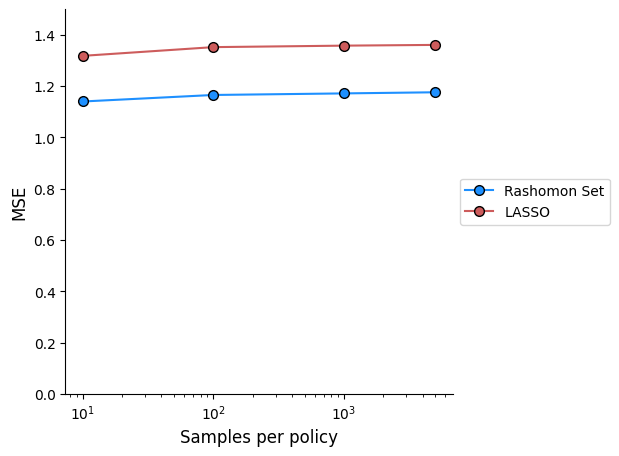

In [55]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

# ax.plot(ct_df["n_per_pol"], ct_df["MSE_mean"],
#         color="seagreen", zorder=3.5, clip_on=False,
#         marker="o", markeredgecolor="black", markersize=7,
#         label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 1.5)
ax.set_ylabel("MSE", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/MSE.png", dpi=300, bbox_inches="tight")
plt.show()

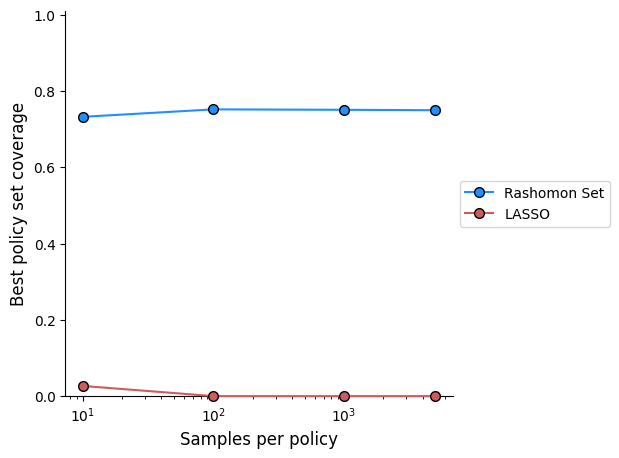

In [56]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

# ax.plot(ct_df["n_per_pol"], ct_df["IOU_mean"],
#         color="seagreen", zorder=3.5, clip_on=False,
#         marker="o", markeredgecolor="black", markersize=7,
#         label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 1.01)
ax.set_ylabel("Best policy set coverage", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/policy_coverage.png", dpi=300, bbox_inches="tight")
plt.show()

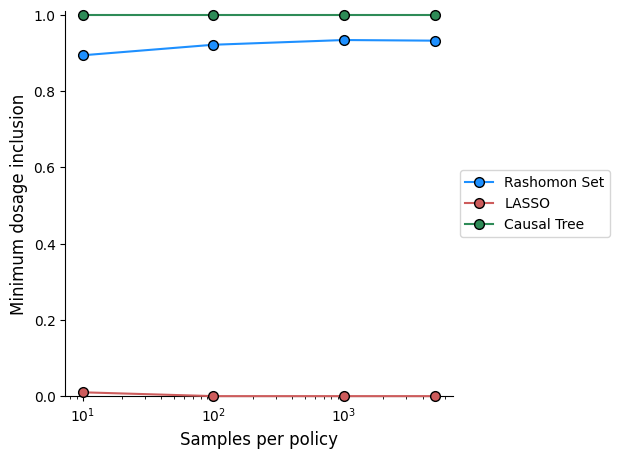

In [59]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["min_dosage_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["min_dosage_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")


# ax.plot(ct_df["n_per_pol"], ct_df["min_dosage_mean"],
#         color="seagreen", zorder=3.5, clip_on=False,
#         marker="o", markeredgecolor="black", markersize=7,
#         label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 1.01)
ax.set_ylabel("Minimum dosage inclusion", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/min_dosage_inclusion_ct.png", dpi=300, bbox_inches="tight")
plt.show()

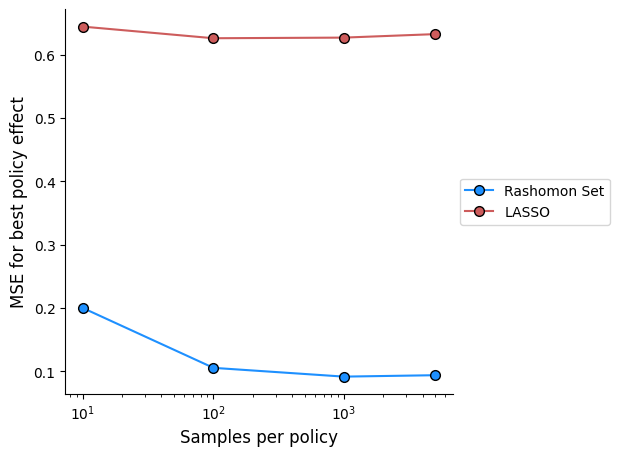

In [58]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

# ax.plot(ct_df["n_per_pol"], ct_df["best_pol_MSE_mean"],
#         color="seagreen", zorder=3.5, clip_on=False,
#         marker="o", markeredgecolor="black", markersize=7,
#         label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
# ax.set_ylim(0, 1)
ax.set_ylabel("MSE for best policy effect", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/worst_case/best_policy_MSE.png", dpi=300, bbox_inches="tight")
plt.show()

# Simulations #2

In [2]:
n = 4
n_str = str(n)

In [3]:
# rashomon_csv = "../Results/simulation_" + n_str + "_rashomon.csv"
rashomon_csv = "../Results/reff_simulations_rashomon_10_10.csv"
rashomon_raw_df = pd.read_csv(rashomon_csv)
rashomon_raw_df = rashomon_raw_df.drop("Unnamed: 0", axis=1)
rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,10,0,9,6.830414,0.0,False,-0.77466,0,0,1,0,0,0,0,0
1,10,0,10,6.749979,0.0,False,-0.77466,0,0,1,0,0,0,0,0
2,10,0,10,6.802508,0.0,False,-0.77466,0,0,1,0,0,0,0,0
3,10,0,10,6.805976,0.0,False,-0.77466,0,0,1,0,0,0,0,0
4,10,0,10,6.817420,0.0,False,-0.77466,0,0,1,0,0,0,0,0


In [4]:
lasso_csv = "../Results/simulation_" + n_str + "_lasso.csv"
lasso_raw_df = pd.read_csv(lasso_csv)
lasso_raw_df = lasso_raw_df.drop("Unnamed: 0", axis=1)
lasso_raw_df.head()

,n_per_pol,sim_num,MSE,L1_loss,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,10,0,1.926917,2.799963,0.0,False,0.637768,0,0,0,0,0,0,0,1
1,10,1,1.938678,2.797062,0.0,False,0.397680,0,0,0,0,0,0,0,1
2,10,2,1.938678,2.797062,0.0,False,0.397680,0,0,0,0,0,0,0,1
3,10,3,1.938678,2.797062,0.0,False,0.397680,0,0,0,0,0,0,0,1
4,10,4,1.938678,2.797062,0.0,False,0.397680,0,0,0,0,0,0,0,1


In [5]:
ct_csv = "../Results/simulation_" + n_str + "_causal_trees.csv"
ct_raw_df = pd.read_csv(ct_csv)
ct_raw_df = ct_raw_df.drop("Unnamed: 0", axis=1)
ct_raw_df.head()

,n_per_pol,sim_num,MSE,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,10,0,1.052201,0.0,False,-0.390068,1,0,1,0,0,0,0,0
1,10,1,1.088813,0.0,False,-0.195540,1,0,1,0,0,0,0,0
2,10,2,1.088813,0.0,False,-0.195540,1,0,1,0,0,0,0,0
3,10,3,1.088813,0.0,False,-0.195540,1,0,1,0,0,0,0,0
4,10,4,1.088813,0.0,False,-0.195540,1,0,1,0,0,0,0,0


### Summarize Rashomon results

In [4]:
rashomon_df = rashomon_raw_df.copy()

reg = 1e-1
rashomon_df["best_pol_MSE"] = rashomon_df["best_pol_diff"]**2
rashomon_df["loss"] = rashomon_df["MSE"] + reg * rashomon_df["num_pools"]

group_by_cols = ["n_per_pol", "sim_num"]
result_cols = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_MSE"]
for result_col in result_cols:
    result_min_col = result_col + "_min"
    result_avg_col = result_col + "_mean"
    result_max_col = result_col + "_max"
    result_var_col = result_col + "_var"
    
    rashomon_df[result_min_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("min")
    rashomon_df[result_avg_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("mean")
    rashomon_df[result_max_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("max")
    rashomon_df[result_var_col] = rashomon_df.groupby(group_by_cols)[result_col].transform("var")


# Find the frequency of best profiles in Rashomon set
# Also find the best profile in the best model in every set
profiles = []
profile_cols = ["(0, 0, 0)", "(0, 0, 1)", "(0, 1, 0)", "(0, 1, 1)",
                "(1, 0, 0)", "(1, 0, 1)", "(1, 1, 0)", "(1, 1, 1)"]
x = rashomon_df.groupby(group_by_cols)["loss"].idxmin()
for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    profile_best_col = profile + "_best"
    rashomon_df[profile_mean_col] = rashomon_df.groupby(group_by_cols)[profile].transform("mean")
    rashomon_df[profile_best_col] = rashomon_df[profile].loc[x]
    

rashomon_df = rashomon_df.drop_duplicates(group_by_cols)
rashomon_df = rashomon_df.drop(result_cols, axis=1)
rashomon_df = rashomon_df.drop(profile_cols, axis=1)
rashomon_df = rashomon_df.drop(["best_pol_diff", "loss"], axis=1)
rashomon_df.head(n=10)

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,"(0, 1, 1)_mean","(0, 1, 1)_best","(1, 0, 0)_mean","(1, 0, 0)_best","(1, 0, 1)_mean","(1, 0, 1)_best","(1, 1, 0)_mean","(1, 1, 0)_best","(1, 1, 1)_mean","(1, 1, 1)_best"
0,10,0,8,11.136173,12,0.578928,6.656034,6.830561,6.934503,0.003194,...,0.041899,0.0,0.0,0.0,0.184358,0.0,0.002793,0.0,0.100559,0.0
1432,10,1,8,10.998596,12,0.307582,6.744401,6.850107,6.876920,0.000984,...,0.017782,0.0,0.0,0.0,0.843238,1.0,0.103416,0.0,0.035564,0.0
3569,10,2,8,11.744539,12,0.269020,6.291256,6.453336,6.498062,0.001375,...,0.006924,0.0,0.0,0.0,0.113883,0.0,0.511997,1.0,0.056345,0.0
11946,10,3,8,11.744539,12,0.269020,6.544169,6.666207,6.697166,0.000443,...,0.090725,0.0,0.0,0.0,0.262266,0.0,0.235406,0.0,0.411603,1.0
20323,10,4,8,11.744539,12,0.269020,6.173545,6.332839,6.350602,0.000241,...,0.000000,0.0,0.0,0.0,0.527277,1.0,0.466038,0.0,0.006685,0.0
28700,10,6,8,9.257143,10,0.255462,6.975335,7.031573,7.056537,0.000711,...,0.028571,0.0,0.0,0.0,0.514286,1.0,0.228571,0.0,0.114286,0.0
28735,10,7,8,11.744539,12,0.269020,6.225072,6.319012,6.349000,0.000572,...,0.323982,0.0,0.0,0.0,0.101946,0.0,0.045482,0.0,0.503760,1.0
37112,10,8,8,11.744539,12,0.269020,6.566183,6.694187,6.729728,0.000852,...,0.859974,1.0,0.0,0.0,0.000000,0.0,0.112690,0.0,0.008953,0.0
45489,10,9,8,11.744539,12,0.269020,6.616126,6.726976,6.760659,0.000695,...,0.149576,0.0,0.0,0.0,0.270980,1.0,0.252000,0.0,0.075087,0.0


### Average over simulations

In [5]:
sum_cols = [
    "num_pools_min", "num_pools_mean", "num_pools_max", "num_pools_var",
    "MSE_min", "MSE_mean", "MSE_max", "MSE_var",
    "IOU_min", "IOU_mean", "IOU_max", "IOU_var",
    "min_dosage_min", "min_dosage_mean", "min_dosage_max", "min_dosage_var",
    "best_pol_MSE_min", "best_pol_MSE_mean", "best_pol_MSE_max", "best_pol_MSE_var",
]
sum_cols += [profile + "_best" for profile in profile_cols]
sum_cols += [profile + "_mean" for profile in profile_cols]

for sum_col in sum_cols:
    rashomon_df[sum_col] = rashomon_df.groupby("n_per_pol")[sum_col].transform("mean")

rashomon_df = rashomon_df.drop_duplicates("n_per_pol")
rashomon_df.head()

,n_per_pol,sim_num,num_pools_min,num_pools_mean,num_pools_max,num_pools_var,MSE_min,MSE_mean,MSE_max,MSE_var,...,"(0, 1, 1)_mean","(0, 1, 1)_best","(1, 0, 0)_mean","(1, 0, 0)_best","(1, 0, 1)_mean","(1, 0, 1)_best","(1, 1, 0)_mean","(1, 1, 0)_best","(1, 1, 1)_mean","(1, 1, 1)_best"
0,10,0,8.0,11.317683,11.777778,0.306233,6.532458,6.656089,6.694797,0.001007,...,0.168826,0.111111,0.0,0.0,0.313137,0.444444,0.217599,0.111111,0.145871,0.222222


In [8]:
lasso_df = lasso_raw_df.copy()

lasso_df["best_pol_MSE"] = lasso_df["best_pol_diff"]**2
sum_cols_lasso = ["MSE", "L1_loss", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_lasso:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    lasso_df[result_min_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("min")
    lasso_df[result_avg_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("mean")
    lasso_df[result_max_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("max")
    lasso_df[result_var_col] = lasso_df.groupby("n_per_pol")[sum_col].transform("var")


for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    lasso_df[profile_mean_col] = lasso_df.groupby("n_per_pol")[profile].transform("mean")

lasso_df = lasso_df.drop_duplicates("n_per_pol")
lasso_df = lasso_df.drop(sum_cols_lasso, axis=1)
lasso_df = lasso_df.drop(["best_pol_diff"], axis=1)
lasso_df = lasso_df.drop(profile_cols, axis=1)
lasso_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,L1_loss_min,L1_loss_mean,L1_loss_max,L1_loss_var,...,best_pol_MSE_max,best_pol_MSE_var,"(0, 0, 0)_mean","(0, 0, 1)_mean","(0, 1, 0)_mean","(0, 1, 1)_mean","(1, 0, 0)_mean","(1, 0, 1)_mean","(1, 1, 0)_mean","(1, 1, 1)_mean"
0,10,0,1.926917,1.938560,1.938678,0.000001,2.797062,2.797091,2.799963,8.415617e-08,...,0.406748,0.000618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
100,100,0,1.917721,1.917721,1.917721,0.000000,2.776592,2.776592,2.776592,0.000000e+00,...,0.429285,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
200,500,0,1.920577,1.920577,1.920577,0.000000,2.771198,2.771198,2.771198,0.000000e+00,...,0.409958,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
300,1000,0,1.914311,1.914311,1.914311,0.000000,2.770546,2.770546,2.770546,0.000000e+00,...,0.421221,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
400,5000,0,1.911713,1.911713,1.911713,0.000000,2.764598,2.764598,2.764598,0.000000e+00,...,0.438067,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [9]:
ct_df = ct_raw_df.copy()

ct_df["best_pol_MSE"] = ct_df["best_pol_diff"]**2
sum_cols_ct = ["MSE", "IOU", "min_dosage", "best_pol_MSE"]

for sum_col in sum_cols_ct:
    result_min_col = sum_col + "_min"
    result_avg_col = sum_col + "_mean"
    result_max_col = sum_col + "_max"
    result_var_col = sum_col + "_var"
    
    ct_df[result_min_col] = ct_df.groupby("n_per_pol")[sum_col].transform("min")
    ct_df[result_avg_col] = ct_df.groupby("n_per_pol")[sum_col].transform("mean")
    ct_df[result_max_col] = ct_df.groupby("n_per_pol")[sum_col].transform("max")
    ct_df[result_var_col] = ct_df.groupby("n_per_pol")[sum_col].transform("var")


for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    ct_df[profile_mean_col] = ct_df.groupby("n_per_pol")[profile].transform("mean")

ct_df = ct_df.drop_duplicates("n_per_pol")
ct_df = ct_df.drop(sum_cols_ct, axis=1)
ct_df = ct_df.drop(["best_pol_diff"], axis=1)
ct_df = ct_df.drop(profile_cols, axis=1)
ct_df.head(n=10)

,n_per_pol,sim_num,MSE_min,MSE_mean,MSE_max,MSE_var,IOU_min,IOU_mean,IOU_max,IOU_var,...,best_pol_MSE_max,best_pol_MSE_var,"(0, 0, 0)_mean","(0, 0, 1)_mean","(0, 1, 0)_mean","(0, 1, 1)_mean","(1, 0, 0)_mean","(1, 0, 1)_mean","(1, 1, 0)_mean","(1, 1, 1)_mean"
0,10,0,1.052201,1.088447,1.088813,0.000013,0.000000,0.000000,0.000000,0.0,...,1.521531e-01,0.00013,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
100,100,0,1.113799,1.113799,1.113799,0.000000,0.500000,0.500000,0.500000,0.0,...,1.262568e-03,0.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
200,500,0,1.120864,1.120864,1.120864,0.000000,0.666667,0.666667,0.666667,0.0,...,3.727007e-06,0.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
300,1000,0,1.114895,1.114895,1.114895,0.000000,0.666667,0.666667,0.666667,0.0,...,2.294134e-07,0.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
400,5000,0,1.118203,1.118203,1.118203,0.000000,0.666667,0.666667,0.666667,0.0,...,1.192473e-06,0.00000,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Plots for best policy profile

In [6]:
profile_col_means = [col + "_mean" for col in profile_cols]
profile_col_best = [col + "_best" for col in profile_cols]
rashomon_best_profile_freqs = []
# lasso_best_profile_freqs = []
for n in [5, 10, 25, 50, 100, 250, 500]:
    rashomon_best_profile_freqs.append(rashomon_df[rashomon_df["n_per_pol"] == n][profile_col_best])
    # lasso_best_profile_freqs.append(lasso_df[lasso_df["n_per_pol"] == n][profile_col_means])

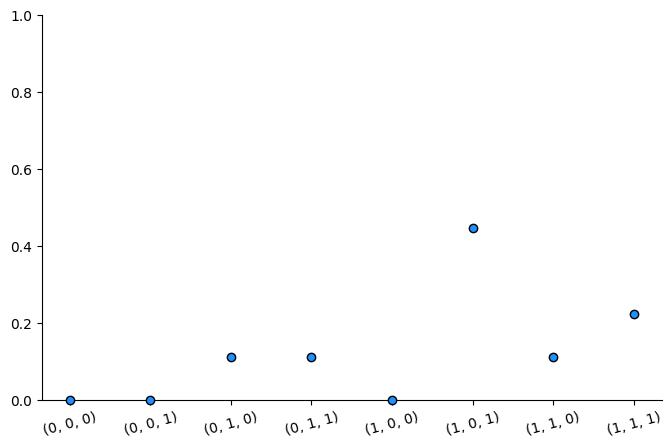

In [11]:
fig, ax = plt.subplots(figsize=(8,5))

ax.spines[['right', 'top']].set_visible(False)
ax.set_xticks(np.arange(len(profile_cols)), profile_cols, rotation=15)
ax.set_ylim(0, 1)


ax.scatter(np.arange(len(profile_cols)), rashomon_best_profile_freqs[1],
           color="dodgerblue", edgecolor="black", zorder=3, clip_on=False,
           # label="Rashomon Set"
          )

ValueError: x and y must be the same size

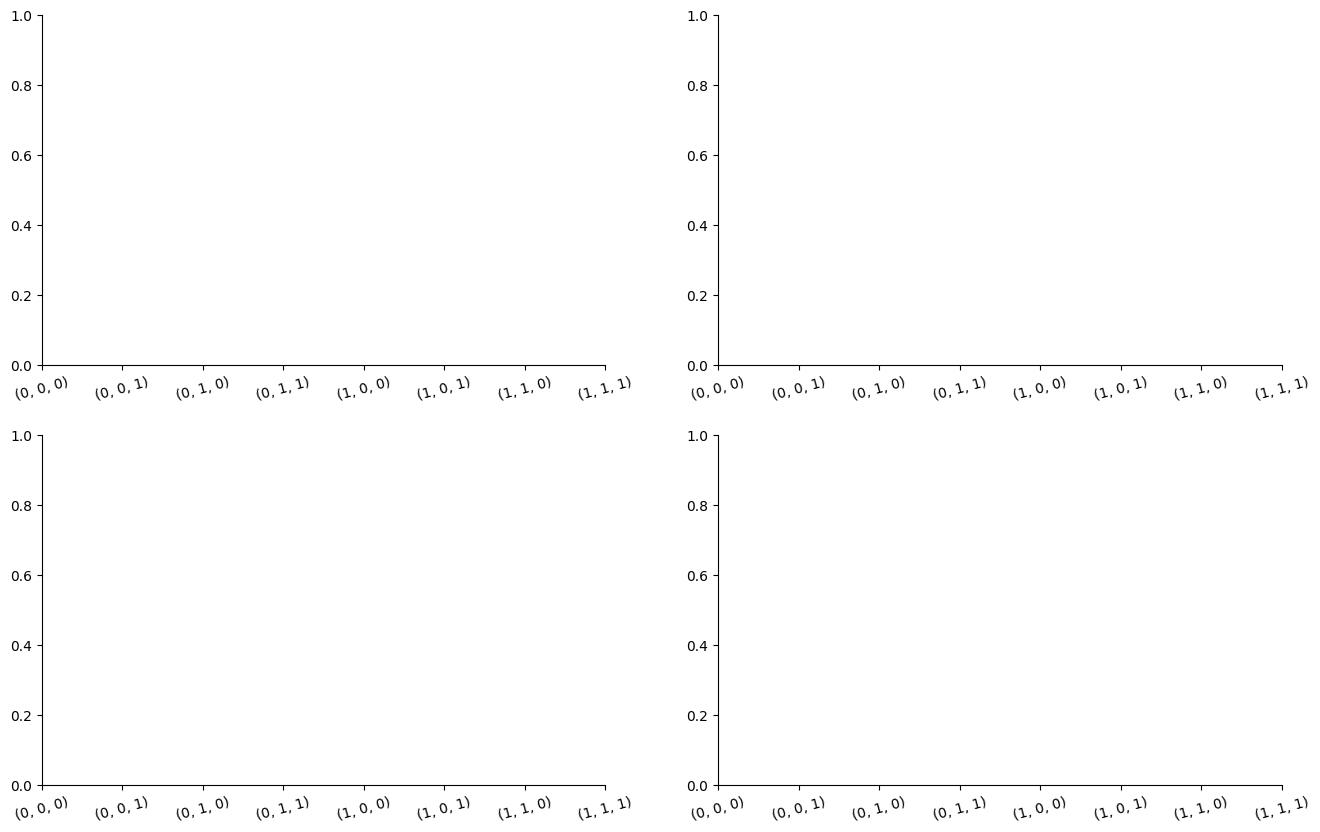

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(16,10))

for i in range(2):
    for j in range(2):
        ax[i, j].spines[['right', 'top']].set_visible(False)
        ax[i, j].set_xticks(np.arange(len(profile_cols)), profile_cols, rotation=15)
        ax[i, j].set_ylim(0, 1)


ax[0, 0].scatter(np.arange(len(profile_cols)), rashomon_best_profile_freqs[0],
           color="dodgerblue", edgecolor="black", zorder=3, clip_on=False,
           # label="Rashomon Set"
          )
# ax[0, 0].scatter(np.arange(len(profile_cols)), lasso_best_profile_freqs[0],
#            color="indianred", edgecolor="black", zorder=3, clip_on=False,
#            # label="Lasso"
#           )
ax[0, 0].set_title("Samples per policy = 10")

ax[0, 1].scatter(np.arange(len(profile_cols)), rashomon_best_profile_freqs[1],
           color="dodgerblue", edgecolor="black", zorder=3, clip_on=False,
           # label="Rashomon Set"
          )
# ax[0, 1].scatter(np.arange(len(profile_cols)), lasso_best_profile_freqs[1],
#            color="indianred", edgecolor="black", zorder=3, clip_on=False,
#            # label="Lasso"
#           )
ax[0, 1].set_title("Samples per policy = 100")

ax[1, 0].scatter(np.arange(len(profile_cols)), rashomon_best_profile_freqs[3],
           color="dodgerblue", edgecolor="black", zorder=3, clip_on=False,
           # label="Rashomon Set"
          )
# ax[1, 0].scatter(np.arange(len(profile_cols)), lasso_best_profile_freqs[3],
#            color="indianred", edgecolor="black", zorder=3, clip_on=False,
#            # label="Lasso"
#           )
ax[1, 0].set_title("Samples per policy = 1000")

ax[1, 1].scatter(np.arange(len(profile_cols)), rashomon_best_profile_freqs[4],
           color="dodgerblue", edgecolor="black", zorder=3, clip_on=False,
           label="Rashomon Set"
          )
# ax[1, 1].scatter(np.arange(len(profile_cols)), lasso_best_profile_freqs[4],
#            color="indianred", edgecolor="black", zorder=3, clip_on=False,
#            label="Lasso"
#           )
ax[1, 1].set_title("Samples per policy = 5000")

# fig.suptitle("Distribution of estimated best feature profile")
fig.supxlabel("Feature profile", fontsize=17)
fig.supylabel("Frequency", fontsize=17)

ax[1, 1].legend(loc="center right", bbox_to_anchor=(1, 0.5))
# fig.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/sim_" + n_str + "/best_profile_freq.png", dpi=300, bbox_inches="tight")
plt.show()

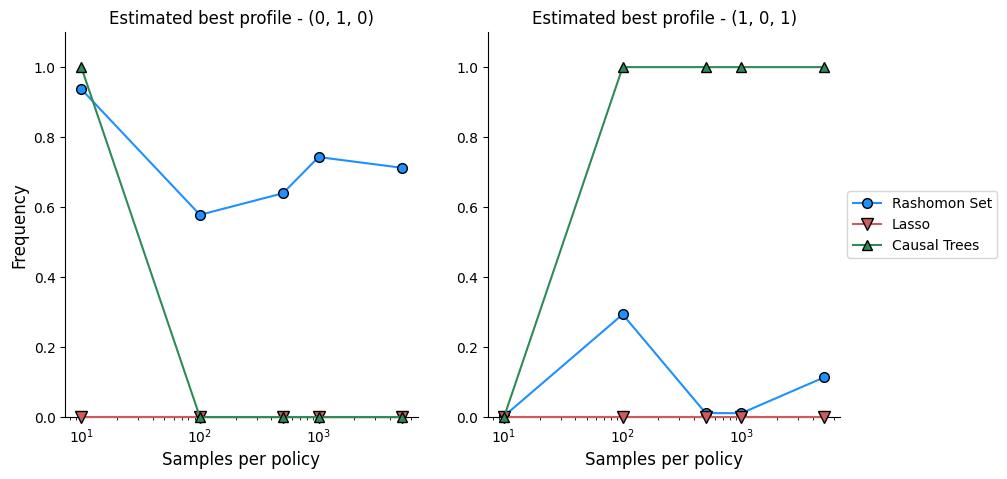

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10,5))

best_prof = "(0, 1, 0)"
second_best_prof = "(1, 0, 1)"

# Rashomon Means
ax[0].plot(rashomon_df["n_per_pol"], rashomon_df[best_prof + "_mean"],
           color="dodgerblue", alpha=1, zorder=1,
           marker="o", markeredgecolor="black", markersize=7,
           label="Rashomon Set")

ax[1].plot(rashomon_df["n_per_pol"], rashomon_df[second_best_prof + "_mean"],
           color="dodgerblue", alpha=1, zorder=1,
           marker="o", markeredgecolor="black", markersize=7,
           label="Rashomon Set")

# LASSO
ax[0].plot(lasso_df["n_per_pol"], lasso_df[best_prof + "_mean"],
           color="indianred", zorder=3, clip_on=False,
           marker="v", markeredgecolor="black", markersize=9,
           label="Lasso")

ax[1].plot(lasso_df["n_per_pol"], lasso_df[second_best_prof + "_mean"],
           color="indianred", zorder=3, clip_on=False,
           marker="v", markeredgecolor="black", markersize=9,
           label="Lasso")


# Causal trees
ax[0].plot(ct_df["n_per_pol"], ct_df[best_prof + "_mean"],
           color="seagreen", alpha=1, zorder=3, clip_on=False,
           marker="^", markeredgecolor="black", markersize=7,
           label="Causal Trees")

ax[1].plot(ct_df["n_per_pol"], ct_df[second_best_prof + "_mean"],
           color="seagreen", alpha=1, zorder=3, clip_on=False,
           marker="^", markeredgecolor="black", markersize=7,
           label="Causal Trees")

for i in range(2):
    ax[i].spines[['right', 'top']].set_visible(False)
    ax[i].set_xscale("log")
    ax[i].set_xlabel("Samples per policy", fontsize=12)
    ax[i].set_ylim(0, 1.1)

ax[0].set_ylabel("Frequency", fontsize=12)
ax[0].set_title("Estimated best profile - " + best_prof, fontsize=12)
ax[1].set_title("Estimated best profile - " + second_best_prof, fontsize=12)
ax[1].legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/sim_" + n_str + "/best_profile_freq.png", dpi=300, bbox_inches="tight")
plt.show()

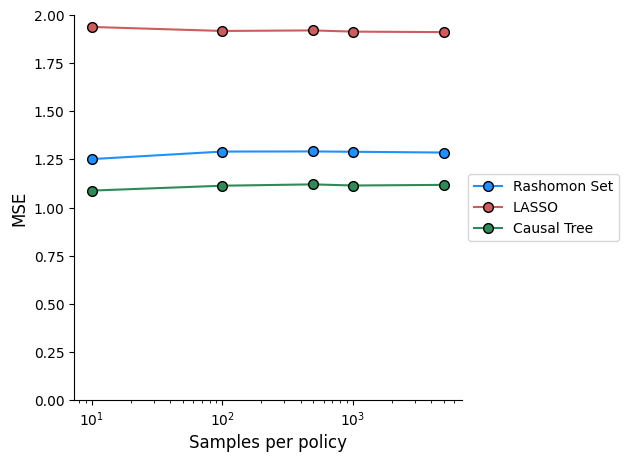

In [43]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["MSE_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 2)
ax.set_ylabel("MSE", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/sim_" + n_str + "/MSE_ct.png", dpi=300, bbox_inches="tight")
plt.show()

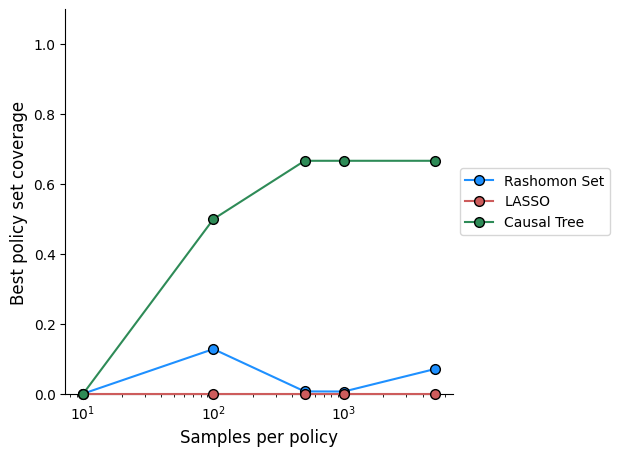

In [44]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["IOU_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["IOU_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["IOU_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 1.1)
ax.set_ylabel("Best policy set coverage", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/sim_" + n_str + "/policy_coverage_ct.png", dpi=300, bbox_inches="tight")
plt.show()

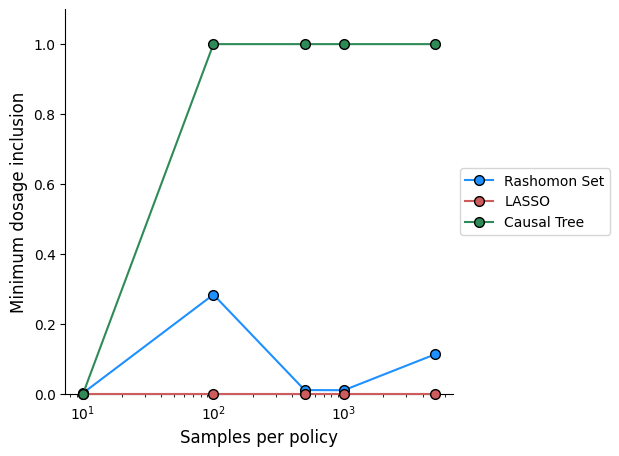

In [45]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["min_dosage_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["min_dosage_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["min_dosage_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 1.1)
ax.set_ylabel("Minimum dosage inclusion", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/sim_" + n_str + "/min_dosage_inclusion_ct.png", dpi=300, bbox_inches="tight")
plt.show()

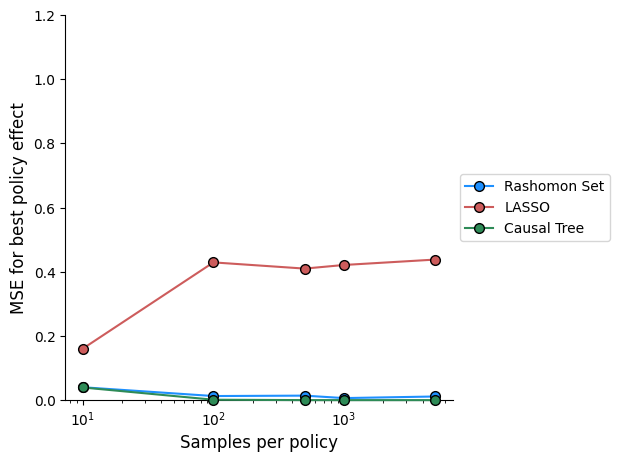

In [46]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

ax.plot(rashomon_df["n_per_pol"], rashomon_df["best_pol_MSE_mean"],
        color="dodgerblue", zorder=1,
        marker="o", markeredgecolor="black", markersize=7,
        label="Rashomon Set")

ax.plot(lasso_df["n_per_pol"], lasso_df["best_pol_MSE_mean"],
        color="indianred", zorder=3, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="LASSO")

ax.plot(ct_df["n_per_pol"], ct_df["best_pol_MSE_mean"],
        color="seagreen", zorder=3.5, clip_on=False,
        marker="o", markeredgecolor="black", markersize=7,
        label="Causal Tree")

ax.set_xscale("log")
ax.set_xlabel("Samples per policy", fontsize=12)
ax.set_ylim(0, 1.2)
ax.set_ylabel("MSE for best policy effect", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5))

# plt.savefig("../Figures/sim_" + n_str + "/best_policy_MSE_ct.png", dpi=300, bbox_inches="tight")
plt.show()

# Reff simulations

In [36]:
# fname_csv = "../Results/reff_simulations_rashomon_25_100.csv"
# fname_csv = "../Results/reff_simulations_rashomon_25_100.csv"
fname_csv = "../Results/reff_simulations_var_1_rashomon_25_100.csv"
rashomon_raw_df = pd.read_csv(fname_csv)
rashomon_raw_df = rashomon_raw_df.drop("Unnamed: 0", axis=1)

rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,25,0,8,1.024706,1.0,True,-0.054145,0,0,0,0,0,1,0,0
1,25,0,9,1.023663,1.0,True,-0.054145,0,0,0,0,0,1,0,0
2,25,0,9,1.023923,1.0,True,-0.054145,0,0,0,0,0,1,0,0
3,25,0,9,1.024535,1.0,True,-0.054145,0,0,0,0,0,1,0,0
4,25,0,9,1.024632,1.0,True,-0.054145,0,0,0,0,0,1,0,0


In [37]:
rashomon_df = rashomon_raw_df.copy()

# compute the loss
reg = 1e-1
rashomon_df["loss"] = rashomon_df["MSE"] + reg * rashomon_df["num_pools"]

# Find whether each model identifies the true best profile or not
true_best_profile = "(1, 0, 1)"
rashomon_df["right_best_profile"] = rashomon_df[true_best_profile]
rashomon_df["wrong_best_profile"] = 1 - rashomon_df["right_best_profile"]

# Remove all other columns
to_drop = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_diff"]
profile_cols = ["(0, 0, 0)", "(0, 0, 1)", "(0, 1, 0)", "(0, 1, 1)",
                "(1, 0, 0)", "(1, 0, 1)", "(1, 1, 0)", "(1, 1, 1)"]
rashomon_df = rashomon_df.drop(to_drop, axis=1)
# rashomon_df = rashomon_df.drop(profile_cols, axis=1)

# Sort loss grouped by n_per_pol and sim_num
rashomon_df = rashomon_df.sort_values(["n_per_pol", "sim_num", "loss"], ascending=True)

# Count models within each simulation iteration
# Check if best profile is present in the first n models
grouped_df = rashomon_df.groupby(["n_per_pol", "sim_num"]).cumsum()
rashomon_df["best_profile_present"] = (grouped_df["right_best_profile"] > 0).astype(int)
rashomon_df["model_number"] = grouped_df["right_best_profile"] + grouped_df["wrong_best_profile"]

print(len(rashomon_df))

rashomon_df.head(n=10)

837700


,n_per_pol,sim_num,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)",loss,right_best_profile,wrong_best_profile,best_profile_present,model_number
0,25,0,0,0,0,0,0,1,0,0,1.824706,1,0,1,1
5439,25,0,0,0,0,0,0,1,0,0,1.921387,1,0,1,2
1220,25,0,0,0,0,1,0,0,0,0,1.921560,0,1,1,3
1673,25,0,0,0,0,0,0,1,0,0,1.921806,1,0,1,4
22,25,0,0,0,0,0,0,0,1,0,1.922482,0,1,1,5
158,25,0,0,0,0,0,0,1,0,0,1.922987,1,0,1,6
602,25,0,0,0,0,0,0,1,0,0,1.923479,1,0,1,7
1,25,0,0,0,0,0,0,1,0,0,1.923663,1,0,1,8
44,25,0,0,0,0,0,0,1,0,0,1.923920,1,0,1,9
2,25,0,0,0,0,0,0,1,0,0,1.923923,1,0,1,10


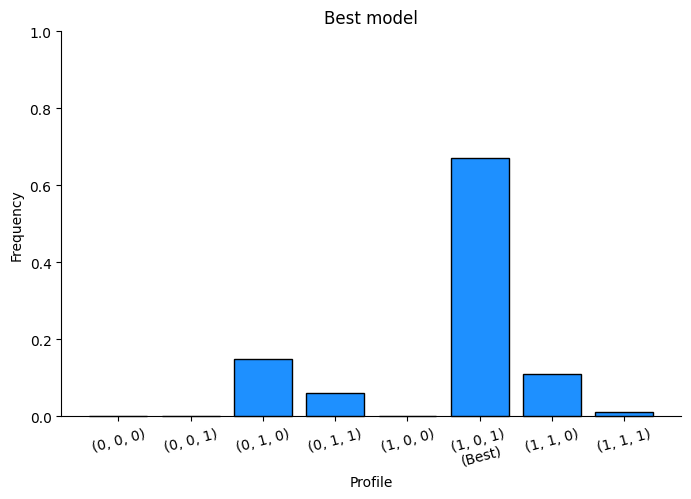

In [38]:
best_models_df = rashomon_df[rashomon_df["model_number"] == 1]

profile_means = []
for profile in profile_cols:
    profile_mean_col = profile + "_mean"
    profile_means.append(np.mean(best_models_df[profile]))

fig, ax = plt.subplots(figsize=(8,5))

ax.spines[['right', 'top']].set_visible(False)
profile_col_labels = deepcopy(profile_cols)
profile_col_labels[-3] = profile_cols[-3] + "\n(Best)"
ax.set_xticks(np.arange(len(profile_cols)), profile_col_labels, rotation=15)
ax.set_ylim(0, 1)


ax.bar(np.arange(len(profile_cols)), profile_means,
           color="dodgerblue", edgecolor="black", zorder=3, clip_on=False,
           # label="Rashomon Set"
          )

ax.set_xlabel("Profile")
ax.set_ylabel("Frequency")
ax.set_title("Best model")

plt.show()

In [50]:
eps_df = rashomon_df.copy()

eps_df = eps_df.drop(profile_cols, axis=1)

eps_df["eps"] = eps_df.groupby(["n_per_pol", "sim_num"])["loss"].transform(lambda x: (x - x.min()) / x.min() * 100)

# eps_levels = [-0.1, 0, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 6]
# eps_levels = [-0.1, 0, 3, 5, 7, 9, 11]
eps_levels = [-0.1, 0, 5.2, 5.4, 5.6, 5.8, 6, 11, 12]

eps_hist = np.histogram(eps_df["eps"])[1].tolist()
eps_levels = [-0.1] + eps_hist + [np.max(eps_df["eps"]) + 0.1]
eps_bins = eps_levels[1:]
eps_df["eps_levels"] = pd.cut(eps_df["eps"], bins=eps_levels, labels=eps_bins)

eps_df.head()

,n_per_pol,sim_num,loss,right_best_profile,wrong_best_profile,best_profile_present,model_number,eps,eps_levels
0,25,0,1.824706,1,0,1,1,0.000000,0.000000
5439,25,0,1.921387,1,0,1,2,5.298416,6.981495
1220,25,0,1.921560,0,1,1,3,5.307899,6.981495
1673,25,0,1.921806,1,0,1,4,5.321380,6.981495
22,25,0,1.922482,0,1,1,5,5.358427,6.981495


In [49]:
np.histogram(eps_df["eps"])[1].tolist()

[0.0,
 2.3271650360082314,
 4.654330072016463,
 6.981495108024694,
 9.308660144032926,
 11.635825180041158,
 13.962990216049388,
 16.29015525205762,
 18.61732028806585,
 20.944485324074083,
 23.271650360082315]

In [51]:


eps_df["profile_rate_eps"] = eps_df.groupby(
    ["n_per_pol", "eps_levels"], observed=False)["best_profile_present"].transform("mean")

eps_df = eps_df.drop_duplicates(["n_per_pol", "eps_levels"])
eps_df = eps_df.drop(["sim_num", "loss", "right_best_profile", "wrong_best_profile", "best_profile_present"], axis=1)

eps_df = eps_df.sort_values("eps_levels")

eps_df

,n_per_pol,model_number,eps,eps_levels,profile_rate_eps
0,25,1,0.000000,0.000000,0.670000
5439,25,2,5.298416,6.981495,0.886667
5892,25,26,10.606314,11.635825,0.954268
73259,25,268,11.636049,13.962990,1.000000
5902,25,278,15.964741,16.290155,1.000000
2488,25,929,16.290518,18.617320,0.992745
78818,25,1838,20.458748,20.944485,1.000000
8271,25,1838,21.350076,23.271650,1.000000


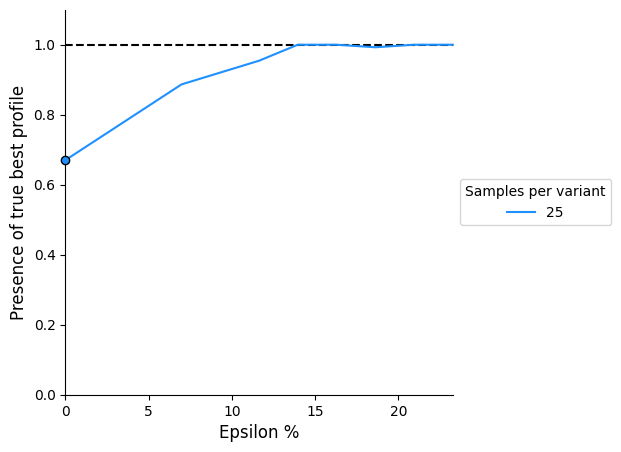

In [54]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

# sizes = [5, 10, 25, 50, 100, 250, 500, 1000]
sizes = [25]
colors = ["dodgerblue", "indianred", "green", "orange", "orchid", "mediumseagreen", "slateblue", "slategray"]

len_x = 10
x_horizontal = np.linspace(0, np.max(eps_df["eps_levels"]), num=len_x)
y_best = np.array([1] * len_x)
# y_baseline = np.array([1/8] * len_x)
ax.plot(x_horizontal, y_best, color="black", ls="--")
# ax.plot(x_horizontal, x_horizontal / 2**24, color="grey", ls="--")

for idx, n in enumerate(sizes):
    n_subset = eps_df[eps_df["n_per_pol"] == n]
    
    ax.plot(n_subset["eps_levels"], n_subset["profile_rate_eps"],
            color=colors[idx], zorder=3.1, clip_on=False,
            label=f"{n}")
    ax.scatter(n_subset["eps_levels"].iloc[0], n_subset["profile_rate_eps"].iloc[0],
               color=colors[idx], edgecolor="black",
               zorder=3.1, clip_on=False)

# ax.set_xscale("log")
ax.set_xlabel("Epsilon %", fontsize=12)
ax.set_ylim(0, 1.1)
ax.set_xlim(0, np.max(eps_df["eps_levels"]))
ax.set_ylabel("Presence of true best profile", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Samples per variant")

# plt.savefig("../Figures/sim_4/true_best_prof.png", dpi=300, bbox_inches="tight")
plt.show()

# Simulation #4 plots

In [2]:
# n_str = str(4)
# extensions = ["_5_100", "_10", "_25_100", "_50", "_100", "_250", "_500", "_1000"]

# temp_df_list = []
# for ext in extensions:
#     temp_csv = "../Results/simulation_" + n_str + "_rashomon" + ext + ".csv"
#     temp_df = pd.read_csv(temp_csv)
#     temp_df = temp_df.drop("Unnamed: 0", axis=1)
#     temp_df_list.append(temp_df)

# rashomon_raw_df = pd.concat(temp_df_list, axis=0, ignore_index=True)
# rashomon_raw_df.head()

,n_per_pol,sim_num,num_pools,MSE,IOU,min_dosage,best_pol_diff,"(0, 0, 0)","(0, 0, 1)","(0, 1, 0)","(0, 1, 1)","(1, 0, 0)","(1, 0, 1)","(1, 1, 0)","(1, 1, 1)"
0,5,0,13,3.061273,0.0,False,-0.836875,0,0,0,1,0,0,0,0
1,5,0,14,3.057480,0.0,False,-0.836875,0,0,0,1,0,0,0,0
2,5,0,15,2.994770,0.0,False,-0.836875,0,0,0,1,0,0,0,0
3,5,0,15,2.995351,0.0,False,-1.299269,0,0,0,0,0,0,0,1
4,5,0,15,3.012999,0.0,False,-0.836875,0,0,0,1,0,0,0,0


In [3]:
# rashomon_df = rashomon_raw_df.copy()

# # compute the loss
# reg = 1e-1
# rashomon_df["loss"] = rashomon_df["MSE"] + reg * rashomon_df["num_pools"]

# # Find whether each model identifies the true best profile or not
# true_best_profile = "(1, 0, 1)"
# rashomon_df["right_best_profile"] = rashomon_df[true_best_profile]
# rashomon_df["wrong_best_profile"] = 1 - rashomon_df["right_best_profile"]

# # Remove all other columns
# to_drop = ["num_pools", "MSE", "IOU", "min_dosage", "best_pol_diff"]
# profile_cols = ["(0, 0, 0)", "(0, 0, 1)", "(0, 1, 0)", "(0, 1, 1)",
#                 "(1, 0, 0)", "(1, 0, 1)", "(1, 1, 0)", "(1, 1, 1)"]
# rashomon_df = rashomon_df.drop(to_drop, axis=1)
# rashomon_df = rashomon_df.drop(profile_cols, axis=1)

# # Sort loss grouped by n_per_pol and sim_num
# rashomon_df = rashomon_df.sort_values(["n_per_pol", "sim_num", "loss"], ascending=True)

# # Count models within each simulation iteration
# # Check if best profile is present in the first n models
# grouped_df = rashomon_df.groupby(["n_per_pol", "sim_num"]).cumsum()
# rashomon_df["best_profile_present"] = (grouped_df["right_best_profile"] > 0).astype(int)
# rashomon_df["model_number"] = grouped_df["right_best_profile"] + grouped_df["wrong_best_profile"]

# print(len(rashomon_df))

# rashomon_df.head(n=10)

23933207


,n_per_pol,sim_num,loss,right_best_profile,wrong_best_profile,best_profile_present,model_number
0,5,0,4.361273,0,1,0,1
7364,5,0,4.428992,0,1,0,2
153,5,0,4.456674,0,1,0,3
1,5,0,4.457480,0,1,0,4
27543,5,0,4.457700,0,1,0,5
773,5,0,4.460014,0,1,0,6
1535,5,0,4.460446,0,1,0,7
38134,5,0,4.460475,0,1,0,8
22,5,0,4.460884,0,1,0,9
19367,5,0,4.461176,0,1,0,10


In [4]:
# sizes = [5, 10, 25, 50, 100, 250, 500, 1000]
# simulations = list(range(100))
# df_groupby = rashomon_df.groupby(["n_per_pol", "sim_num"]).count()

# new_rows = []

# for n in sizes:
#     df_n = rashomon_df[rashomon_df["n_per_pol"] == n]
#     max_model_size = df_n["model_number"].max()
    
#     for t in simulations:
#         df_n_t = df_n[df_n["sim_num"] == t]
#         this_model_size = df_n_t["model_number"].max()
#         if len(df_n_t) == 0:
#             continue
#         last_row = df_n_t.iloc[-1]
#         dummy_row = [n, t, 0, 0, 0, last_row[-2], 0]
#         # dummy_row = [n, t, 0, 0, 0, 1, 0]
#         for i in range(this_model_size, max_model_size):
#             this_row = deepcopy(dummy_row)
#             this_row[-1] = i + 1
#             # if i + 1 == max_model_size:
#             #     this_row[-2] = 1
#             new_rows.append(this_row)

# new_df = pd.DataFrame(new_rows, columns=rashomon_df.columns)

# rashomon_df = pd.concat([rashomon_df, new_df], ignore_index=True)

/var/folders/ds/v36htzx10pv39ydvb7plxs1r0000gn/T/ipykernel_63600/2133077144.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  dummy_row = [n, t, 0, 0, 0, last_row[-2], 0]


In [6]:
# rashomon_df["profile_rate"] = rashomon_df.groupby(["n_per_pol", "model_number"])["best_profile_present"].transform("mean")

# rashomon_df = rashomon_df.drop_duplicates(["n_per_pol", "model_number"])
# rashomon_df = rashomon_df.drop(["sim_num", "loss", "right_best_profile", "wrong_best_profile", "best_profile_present"], axis=1)

# # rashomon_df.to_csv("../Results/simulation_4_rashomon_processed.csv")

# print(len(rashomon_df))
# rashomon_df.head(n=10)

1007718


,n_per_pol,model_number,profile_rate
0,5,1,0.12
1,5,2,0.15
2,5,3,0.16
3,5,4,0.17
4,5,5,0.18
5,5,6,0.18
6,5,7,0.18
7,5,8,0.18
8,5,9,0.18
9,5,10,0.18


In [35]:
rashomon_df = pd.read_csv("../Results/simulation_4_rashomon_processed.csv")

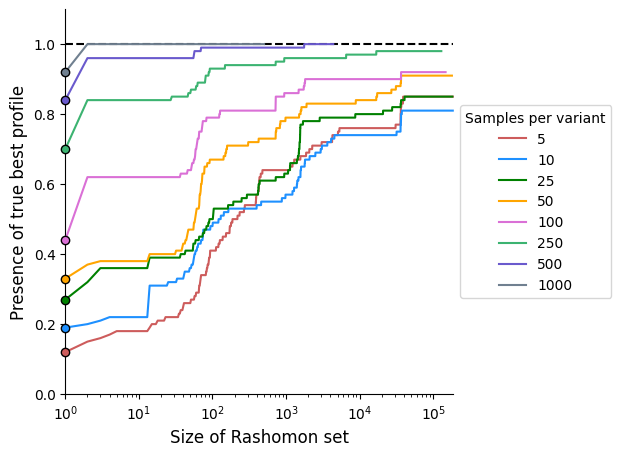

In [34]:
fig, ax = plt.subplots(figsize=(5,5))

ax.spines[['right', 'top']].set_visible(False)

sizes = [5, 10, 25, 50, 100, 250, 500, 1000]
colors = ["indianred", "dodgerblue", "green", "orange", "orchid", "mediumseagreen", "slateblue", "slategray"]

# x_horizontal = np.linspace(1, np.max(rashomon_df["model_number"]), num=10)
x_horizontal = np.logspace(-1, 6, num=10, base=10)
len_x = len(x_horizontal)
y_best = np.array([1] * len_x)
y_baseline = np.array([1/8] * len_x)
ax.plot(x_horizontal, y_best, color="black", ls="--")
# ax.plot(x_horizontal, x_horizontal / 2**24, color="grey", ls="--")

for idx, n in enumerate(sizes):
    n_subset = rashomon_df[rashomon_df["n_per_pol"] == n]
    
    ax.plot(n_subset["model_number"], n_subset["profile_rate"],
            color=colors[idx], zorder=3.1, clip_on=False,
            label=f"{n}")
    ax.scatter(n_subset["model_number"].iloc[0], n_subset["profile_rate"].iloc[0],
               color=colors[idx], edgecolor="black",
               zorder=3.1, clip_on=False)

ax.set_xscale("log")
ax.set_xlabel("Size of Rashomon set", fontsize=12)
ax.set_ylim(0, 1.1)
ax.set_xlim(1, np.max(rashomon_df["model_number"]))
ax.set_ylabel("Presence of true best profile", fontsize=12)

ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Samples per variant")

# plt.savefig("../Figures/sim_4/true_best_prof.png", dpi=300, bbox_inches="tight")
plt.show()

### Heat map

In [32]:
heatmap_df = rashomon_raw_df.copy()

reg = 1e-1
heatmap_df["loss"] = heatmap_df["MSE"] + reg * heatmap_df["num_pools"]
heatmap_df["posterior"] = np.exp(-heatmap_df["loss"])
heatmap_df["posterior"] = (heatmap_df["posterior"] - np.min(heatmap_df["posterior"])) / \
    (np.max(heatmap_df["posterior"]) - np.min(heatmap_df["posterior"]))


heatmap_dfs = [None]*4
heatmap_dfs[0] = heatmap_df[heatmap_df["n_per_pol"] == 10]
heatmap_dfs[1] = heatmap_df[heatmap_df["n_per_pol"] == 100]
heatmap_dfs[2] = heatmap_df[heatmap_df["n_per_pol"] == 1000]
heatmap_dfs[3] = heatmap_df[heatmap_df["n_per_pol"] == 5000]
# for i in range(4):
#     heatmap_dfs[i]["posterior"] = (heatmap_dfs[i]["posterior"] - np.min(heatmap_dfs[i]["posterior"])) / \
#         (np.max(heatmap_dfs[i]["posterior"]) - np.min(heatmap_dfs[i]["posterior"]))
    

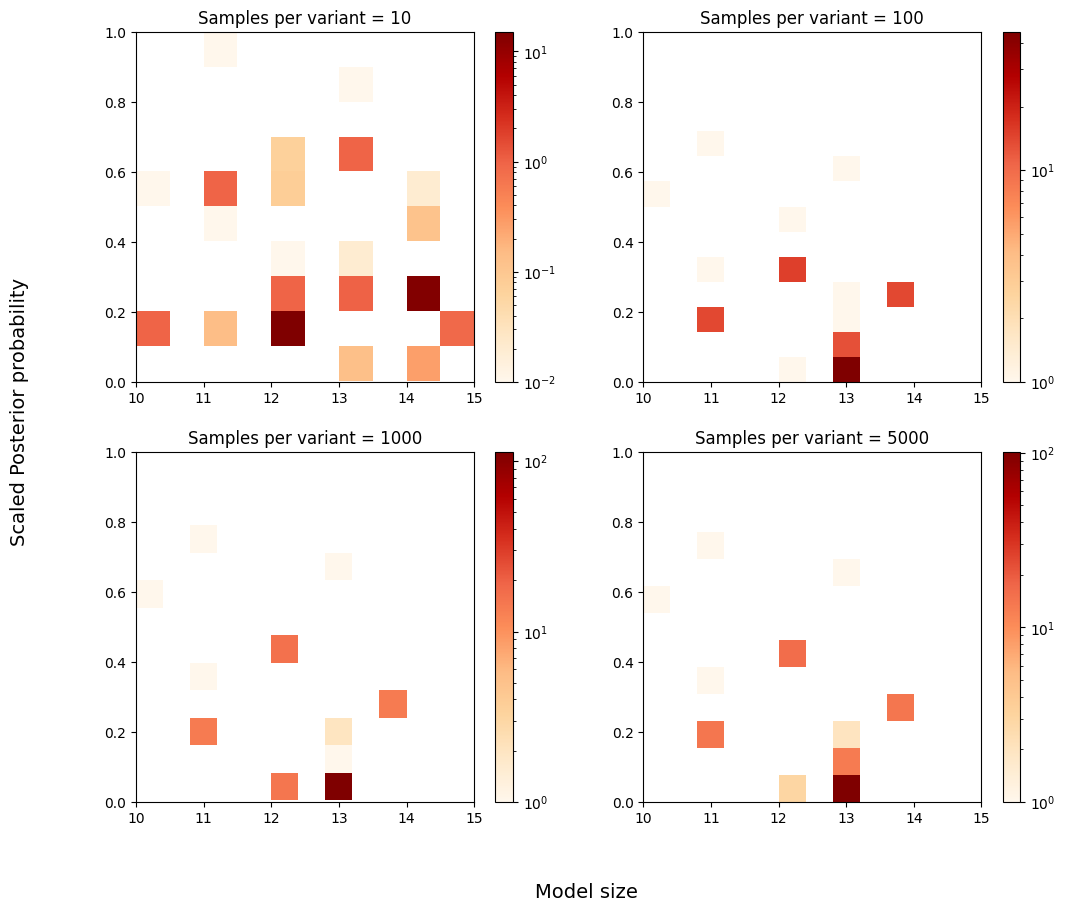

In [33]:
fig, ax = plt.subplots(2, 2, figsize=(12,10))

h = ax[0, 0].hist2d(heatmap_dfs[0]["num_pools"], heatmap_dfs[0]["posterior"], norm=colors.LogNorm(),
             cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[0]))
ax[0, 0].set_title("Samples per variant = 10", fontsize=12)
fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[0, 0])

h = ax[0, 1].hist2d(heatmap_dfs[1]["num_pools"], heatmap_dfs[1]["posterior"], norm=colors.LogNorm(),
             cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[1]))
ax[0, 1].set_title("Samples per variant = 100", fontsize=12)
fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[0, 1])

h = ax[1, 0].hist2d(heatmap_dfs[2]["num_pools"], heatmap_dfs[2]["posterior"], norm=colors.LogNorm(),
             cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[2]))
ax[1, 0].set_title("Samples per variant = 1000", fontsize=12)
fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[1, 0])

h = ax[1, 1].hist2d(heatmap_dfs[3]["num_pools"], heatmap_dfs[3]["posterior"], norm=colors.LogNorm(),
             cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[3]))
ax[1, 1].set_title("Samples per variant = 5000", fontsize=12)
fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[1, 1])

for i in range(2):
    for j in range(2):
        ax[i, j].set_ylim(0, 1)
        ax[i, j].set_xlim(10, 15)
#         ax[i, j].set_ylabel("Scaled Posterior probability", fontsize=12)


fig.supylabel("Scaled Posterior probability", fontsize=14)
fig.supxlabel("Model size", fontsize=14)

# plt.savefig("../Figures/sim_" + n_str + "/rset_2d_hist.png", dpi=300, bbox_inches="tight")
plt.show()

### Sample heatmap

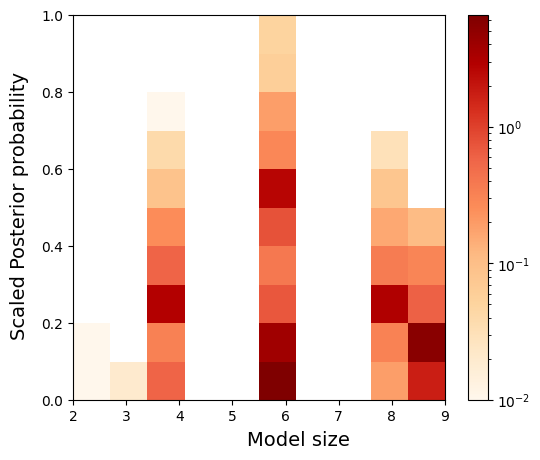

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(6,5))

h = ax.hist2d(heatmap_df["num_pools"], heatmap_df["posterior"], norm=colors.LogNorm(),
             cmap="OrRd", weights=[1e-2]*len(heatmap_df))
fig.colorbar(h[3], norm=colors.NoNorm, ax=ax)

# h = ax[0, 1].hist2d(heatmap_dfs[1]["num_pools"], heatmap_dfs[1]["posterior"], norm=colors.LogNorm(),
#              cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[1]))
# ax[0, 1].set_title("Samples per variant = 100", fontsize=12)
# fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[0, 1])

# h = ax[1, 0].hist2d(heatmap_dfs[2]["num_pools"], heatmap_dfs[2]["posterior"], norm=colors.LogNorm(),
#              cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[2]))
# ax[1, 0].set_title("Samples per variant = 1000", fontsize=12)
# fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[1, 0])

# h = ax[1, 1].hist2d(heatmap_dfs[3]["num_pools"], heatmap_dfs[3]["posterior"], norm=colors.LogNorm(),
#              cmap="OrRd", weights=[1e-2]*len(heatmap_dfs[3]))
# ax[1, 1].set_title("Samples per variant = 5000", fontsize=12)
# fig.colorbar(h[3], norm=colors.NoNorm, ax=ax[1, 1])

for i in range(1):
    for j in range(1):
        ax.set_ylim(0, 1)
        ax.set_xlim(2, 9)
#         ax[i, j].set_ylabel("Scaled Posterior probability", fontsize=12)


fig.supylabel("Scaled Posterior probability", fontsize=14)
fig.supxlabel("Model size", fontsize=14)

# plt.savefig("../Figures/ex_2d_hist.png", dpi=300, bbox_inches="tight")
plt.show()